# 08 Sampling Interfaces and Orientations from Raster

Interfaces can be directly sampled from a digital elevation model or subsurface raster/mesh while orientations have to be sampled from the digital elevation model/raster, the slope for the dipping angle and the aspect for the azimuth.

<img src="../images/tutorial08_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/08_sampling_interfaces_orientations_from_raster/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="08_sampling_interfaces_orientations_from_raster.zip", dirpath=file_path)

## Loading raster data

In [3]:
import rasterio

raster = rasterio.open(file_path + 'raster.tif')

In [4]:
raster.bounds

BoundingBox(left=-4.440892098500626e-16, bottom=1.3642420526593924e-12, right=971.002897605575, top=1068.1031873661339)

## Plotting the raster

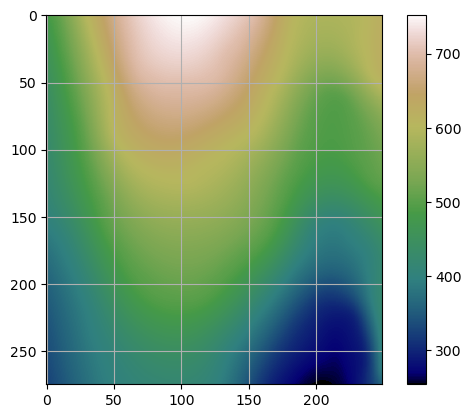

In [5]:
import matplotlib.pyplot as plt

im = plt.imshow(raster.read(1), cmap='gist_earth')
plt.grid()
plt.colorbar(im)

## Sampling Interfaces from Raster

### Sampling by lists

Sampling interfaces from a raster given lists of X and Y coordinates is done using ``sample_interfaces(..)``.

In [6]:
point_x = [100, 200, 300, 400, 500]
point_y = [100, 200, 300, 400, 500]

gdf = gg.raster.sample_interfaces(raster=raster, 
                                  point_x=point_x,
                                  point_y=point_y,
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,100.00,100.00,376.72,POINT (100.00000 100.00000),Test
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test
3,400.00,400.00,540.68,POINT (400.00000 400.00000),Test
4,500.00,500.00,561.65,POINT (500.00000 500.00000),Test


### Plotting the data

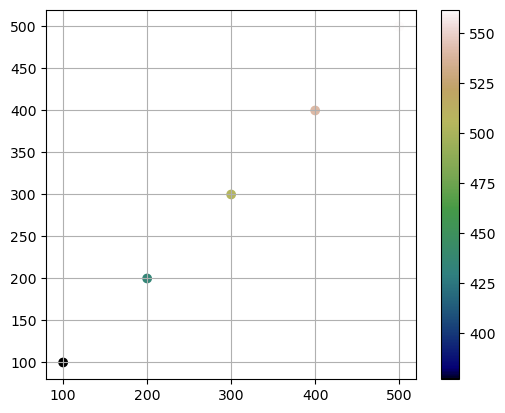

In [7]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling by arrays

Sampling interfaces from an array given lists of X and Y coordinates.

In [8]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_interfaces(raster=raster.read(1), 
                                  point_x=point_x,
                                  point_y=point_y,
                                  extent=[0, 972, 0 ,1069],
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,100.00,100.00,378.80,POINT (100.00000 100.00000),Test
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test
3,400.00,400.00,541.74,POINT (400.00000 400.00000),Test
4,500.00,500.00,562.02,POINT (500.00000 500.00000),Test


### Plotting the data

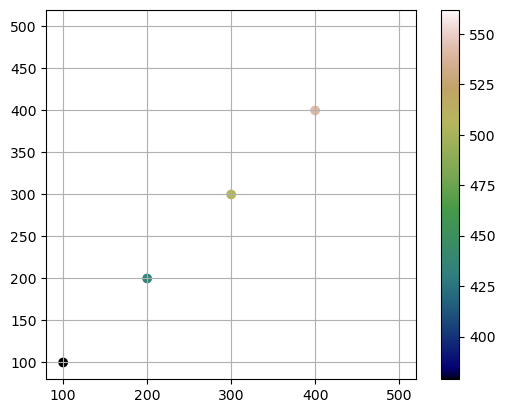

In [9]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling Randomly from rasterio object

Sampling interfaces randomly from a raster.

In [10]:
gdf = gg.raster.sample_interfaces(raster=raster, 
                                  random_samples=10,
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,199.86,496.09,520.81,POINT (199.85519 496.09330),Test
1,511.85,763.18,643.24,POINT (511.85172 763.17686),Test
2,643.35,886.38,620.91,POINT (643.35122 886.37867),Test
3,965.65,1045.58,620.59,POINT (965.65475 1045.58279),Test
4,172.10,864.05,602.61,POINT (172.10151 864.05005),Test
5,744.41,52.90,276.00,POINT (744.40762 52.90476),Test
6,739.94,823.36,533.44,POINT (739.93577 823.35867),Test
7,942.70,406.58,414.82,POINT (942.69846 406.58069),Test
8,420.50,87.25,436.52,POINT (420.50070 87.24755),Test
9,339.68,264.21,503.23,POINT (339.68451 264.21229),Test


### Plotting the data

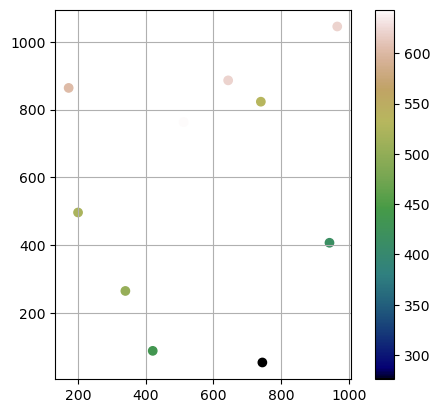

In [11]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling Randomly from Array

Sampling interfaces randomly from an array.

In [12]:
gdf = gg.raster.sample_interfaces(raster=raster.read(1), 
                                  random_samples=10,
                                  extent=[0, 972, 0 ,1069],
                                  formation='Test',
                                  crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation
0,950.27,424.37,426.03,POINT (950.26670 424.37299),Test
1,205.91,83.67,410.35,POINT (205.90842 83.67224),Test
2,833.19,424.42,388.64,POINT (833.18890 424.42058),Test
3,442.79,68.90,427.47,POINT (442.79487 68.90223),Test
4,333.34,642.61,620.60,POINT (333.33986 642.60911),Test
5,905.91,585.65,484.48,POINT (905.90705 585.64586),Test
6,359.39,1025.74,742.35,POINT (359.39233 1025.74463),Test
7,599.42,936.93,660.12,POINT (599.41731 936.92645),Test
8,14.28,532.99,417.31,POINT (14.28131 532.98620),Test
9,177.50,985.25,643.90,POINT (177.49500 985.24662),Test


### Plotting the data

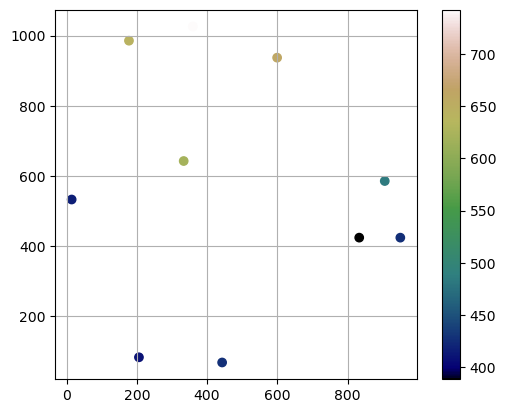

In [13]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

## Sampling Orientations from Raster

### Sampling from lists

Sampling orientations from a raster given lists of X and Y coordinates.

In [14]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_orientations(raster=raster, 
                                    point_x=point_x,
                                    point_y=point_y,
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,100.00,100.00,376.72,POINT (100.00000 100.00000),Test,23.77,255.93,1
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test,30.46,239.55,1
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test,17.34,222.68,1
3,400.00,400.00,540.68,POINT (400.00000 400.00000),Test,15.51,178.84,1
4,500.00,500.00,561.65,POINT (500.00000 500.00000),Test,19.26,145.55,1


### Plotting the data

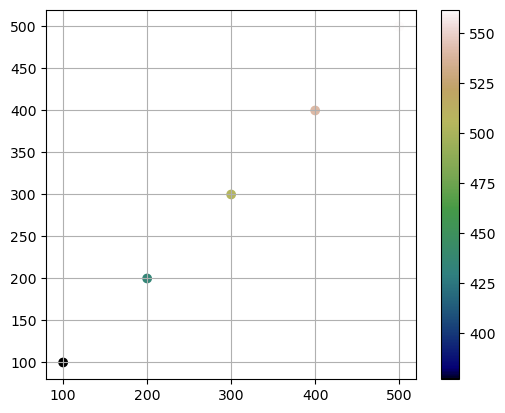

In [15]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sampling from arrays

Sampling orientations from an array given lists of X and Y coordinates.

In [16]:
point_x = [100, 200, 300, 400 ,500]
point_y = [100, 200, 300, 400 ,500]

gdf = gg.raster.sample_orientations(raster=raster.read(1), 
                                    point_x=point_x,
                                    point_y=point_y,
                                    extent=[0, 972, 0 ,1069],
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,100.00,100.00,378.80,POINT (100.00000 100.00000),Test,23.75,255.93,1
1,200.00,200.00,435.22,POINT (200.00000 200.00000),Test,30.44,239.55,1
2,300.00,300.00,505.29,POINT (300.00000 300.00000),Test,17.32,222.68,1
3,400.00,400.00,541.74,POINT (400.00000 400.00000),Test,15.50,178.84,1
4,500.00,500.00,562.02,POINT (500.00000 500.00000),Test,19.24,145.55,1


### Sampling randomly from rasterio object

Sampling orientations randomly from a raster.

In [17]:
gdf = gg.raster.sample_orientations(raster=raster, 
                                    random_samples=10,
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,770.72,454.44,411.17,POINT (770.72317 454.43623),Test,35.50,126.05,1
1,98.85,104.73,377.13,POINT (98.85090 104.72719),Test,24.00,256.35,1
2,439.88,23.92,417.44,POINT (439.88303 23.91500),Test,15.43,138.91,1
3,444.39,434.85,548.88,POINT (444.39082 434.84986),Test,16.92,165.67,1
4,642.46,857.77,612.54,POINT (642.45819 857.77092),Test,33.90,115.23,1
5,668.68,101.45,321.65,POINT (668.68137 101.45438),Test,34.24,122.96,1
6,833.16,737.23,491.34,POINT (833.16382 737.23242),Test,3.94,242.61,1
7,137.75,604.27,506.55,POINT (137.75113 604.27271),Test,39.04,252.36,1
8,249.23,610.05,590.12,POINT (249.22976 610.04522),Test,30.48,224.83,1
9,799.49,1011.20,581.62,POINT (799.49348 1011.19910),Test,11.49,170.42,1


### Plotting the data

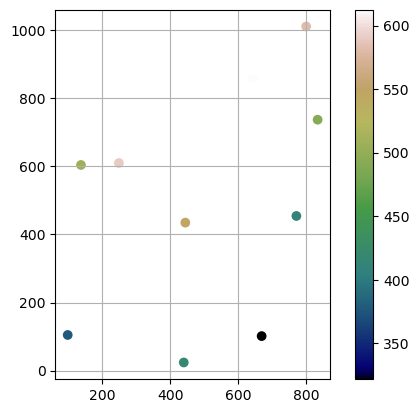

In [18]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()

### Sample randomly from array

Sampling orientations randomly from an array.

In [19]:
gdf = gg.raster.sample_orientations(raster=raster.read(1), 
                                    random_samples=10,
                                    extent=[0, 972, 0 ,1069],
                                    formation='Test',
                                    crs='EPSG:4326')

gdf

,X,Y,Z,geometry,formation,dip,azimuth,polarity
0,433.83,627.61,606.19,POINT (433.82765 627.60890),Test,19.29,144.83,1
1,732.25,1007.74,594.51,POINT (732.25432 1007.73581),Test,21.30,109.13,1
2,849.26,539.88,444.47,POINT (849.25852 539.87992),Test,29.99,196.23,1
3,506.54,297.89,499.94,POINT (506.54294 297.89069),Test,22.06,134.76,1
4,482.80,959.46,715.72,POINT (482.79546 959.45977),Test,21.73,129.97,1
5,914.62,832.23,543.36,POINT (914.61626 832.23124),Test,45.25,231.65,1
6,16.88,805.99,447.03,POINT (16.88303 805.98712),Test,37.63,260.69,1
7,97.01,896.66,534.58,POINT (97.00884 896.65803),Test,48.06,257.25,1
8,528.77,325.33,500.61,POINT (528.77290 325.33217),Test,20.33,138.42,1
9,635.98,435.47,500.45,POINT (635.98363 435.47230),Test,29.20,118.66,1


### Plotting the data

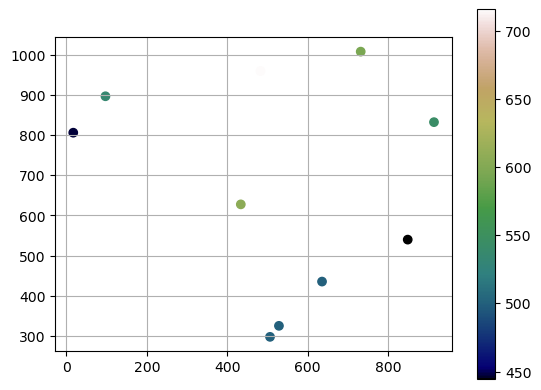

In [20]:
gdf.plot(column='Z', cmap='gist_earth', aspect='equal', legend=True)
plt.grid()